In [5]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [6]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [7]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

# Support Vector Classifer

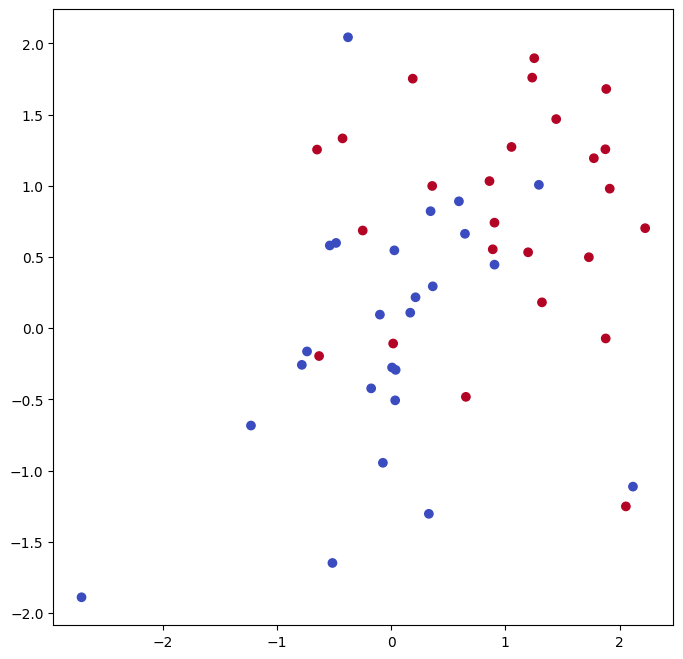

In [8]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y == 1] += 1
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=cm.coolwarm)


In [9]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')